# Dataset

https://www.kaggle.com/code/yasserh/walmart-sales-prediction-best-ml-algorithms

Dataset Info:

Store - the store number

Date - the week of sales

Weekly_Sales - sales for the given store

Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week

Temperature - Temperature on the day of sale

Fuel_Price - Cost of fuel in the region

CPI – Prevailing consumer price index

Unemployment - Prevailing unemployment rate

Holiday Events\ Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13\ Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13\ Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13\ Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13



In [109]:
import pandas as pd
import numpy as np

df = pd.read_csv('./Walmart.csv')

In [110]:
#random data loser
missing_fraction = 0.2  # 20 %
mask = np.random.rand(*df.shape) < missing_fraction
df = df.mask(mask)

In [111]:
df.describe()
df.info()

for c in df.columns:
   print(f"Col: {c} | {df[c].isna().sum()} / {df.shape[0]}")
print(60*"*")

print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         5180 non-null   float64
 1   Date          5179 non-null   object 
 2   Weekly_Sales  5164 non-null   float64
 3   Holiday_Flag  5112 non-null   float64
 4   Temperature   5135 non-null   float64
 5   Fuel_Price    5183 non-null   float64
 6   CPI           5165 non-null   float64
 7   Unemployment  5108 non-null   float64
dtypes: float64(7), object(1)
memory usage: 402.3+ KB
Col: Store | 1255 / 6435
Col: Date | 1256 / 6435
Col: Weekly_Sales | 1271 / 6435
Col: Holiday_Flag | 1323 / 6435
Col: Temperature | 1300 / 6435
Col: Fuel_Price | 1252 / 6435
Col: CPI | 1270 / 6435
Col: Unemployment | 1327 / 6435
************************************************************
Store           1255
Date            1256
Weekly_Sales    1271
Holiday_Flag    1323
Temperature     1300
Fuel_Price     

In [112]:
# doplnění chybějících hodnot

df.head(10)


for c in df.columns:
   print(f"Col: {c}")
   print(df[c].unique())
   print(10*"_")

Col: Store
[ 1. nan  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45.]
__________
Col: Date
['05-02-2010' nan '19-02-2010' '26-02-2010' '05-03-2010' '12-03-2010'
 '19-03-2010' '02-04-2010' '09-04-2010' '16-04-2010' '23-04-2010'
 '30-04-2010' '07-05-2010' '14-05-2010' '28-05-2010' '04-06-2010'
 '11-06-2010' '02-07-2010' '16-07-2010' '23-07-2010' '30-07-2010'
 '13-08-2010' '20-08-2010' '27-08-2010' '03-09-2010' '10-09-2010'
 '17-09-2010' '01-10-2010' '08-10-2010' '15-10-2010' '22-10-2010'
 '29-10-2010' '05-11-2010' '12-11-2010' '26-11-2010' '03-12-2010'
 '10-12-2010' '17-12-2010' '24-12-2010' '07-01-2011' '14-01-2011'
 '21-01-2011' '28-01-2011' '04-02-2011' '11-02-2011' '25-02-2011'
 '04-03-2011' '11-03-2011' '18-03-2011' '25-03-2011' '01-04-2011'
 '08-04-2011' '22-04-2011' '13-05-2011' '20-05-2011' '03-06-2011'
 '10-06-2011' '17-06-2011' '24-06-2011' '01-07-201

In [113]:
from datetime import datetime

#seřazení podle datumu -> smazání řádků podle datumu, ordinal encoder
df = df.dropna(subset=["Date", "Store"])
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")
df = df.sort_values(by='Date')

# nastavit store na int
df['Store'] = df['Store'].astype("int")

df.info()


print(df.head(10))

<class 'pandas.core.frame.DataFrame'>
Index: 4171 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         4171 non-null   int64         
 1   Date          4171 non-null   datetime64[ns]
 2   Weekly_Sales  3347 non-null   float64       
 3   Holiday_Flag  3322 non-null   float64       
 4   Temperature   3323 non-null   float64       
 5   Fuel_Price    3368 non-null   float64       
 6   CPI           3340 non-null   float64       
 7   Unemployment  3313 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 293.3 KB
      Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1 2010-02-05           NaN           NaN        42.31       2.572   
2431     18 2010-02-05    1205307.50           NaN        21.33       2.788   
2574     19 2010-02-05    1507637.17           0.0        20.96         NaN   
2717     20 

In [114]:
#ordinální kodovani datumu
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
df['Date'] = enc.fit_transform(df['Date'].values.reshape(-1, 1))
print(df.head())

      Store  Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1   0.0           NaN           NaN        42.31       2.572   
2431     18   0.0    1205307.50           NaN        21.33       2.788   
2574     19   0.0    1507637.17           0.0        20.96         NaN   
2717     20   0.0           NaN           NaN        25.92       2.784   
2860     21   0.0     798593.88           0.0        39.05       2.572   

             CPI  Unemployment  
0     211.096358           NaN  
2431         NaN         9.202  
2574  131.527903         8.350  
2717  204.247194         8.187  
2860  210.752605           NaN  


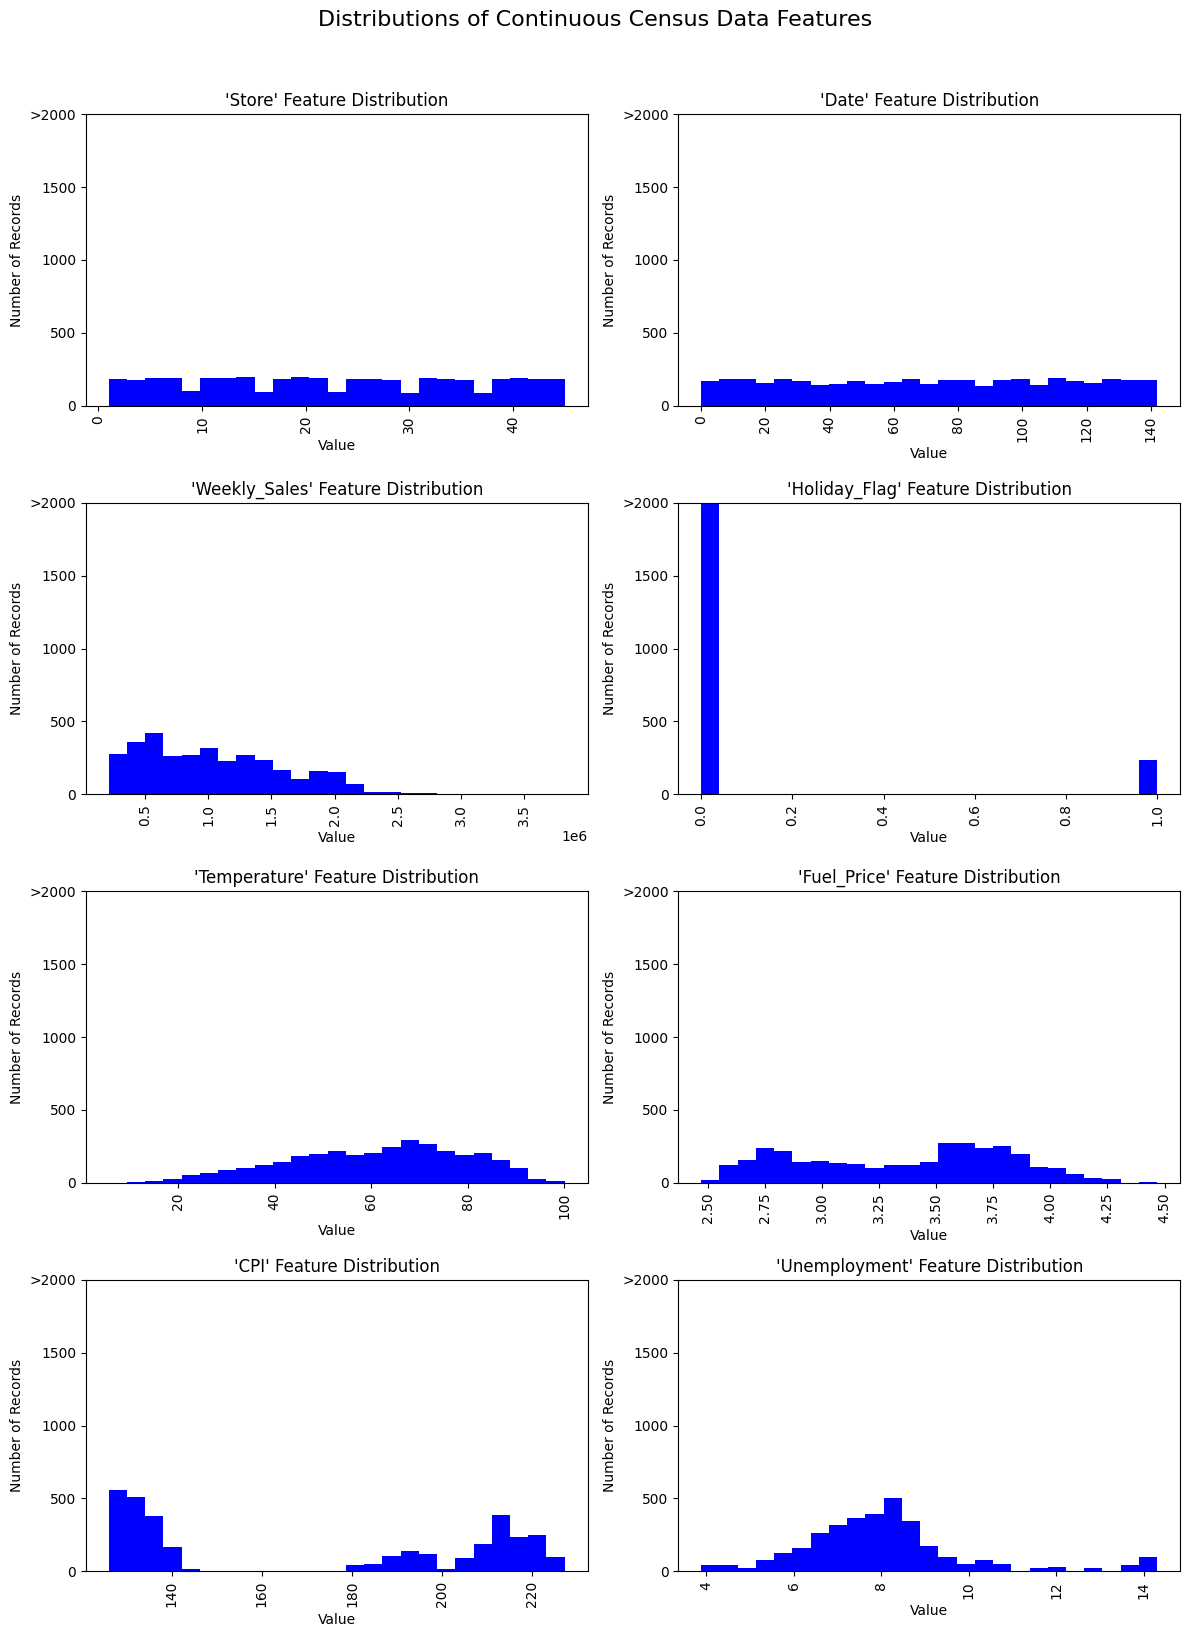

In [115]:
# zobrazení distribuce
import matplotlib.pyplot as plt
import math

n_cols = 2   # kolik grafů vedle sebe
n_rows = math.ceil(len(df.columns) / n_cols) #nejblizší int

fig = plt.figure(figsize=(12, n_rows * 4))

for i, col in enumerate(df.columns):
    ax = fig.add_subplot(n_rows, n_cols, i + 1)
    ax.hist(df[col], bins=25, color='blue')
    ax.set_title(f"'{col}' Feature Distribution", fontsize=12)
    ax.set_xlabel("Value")
    ax.tick_params(axis='x', labelrotation=90)
    ax.set_ylabel("Number of Records")
    ax.set_ylim((0, 2000))
    ax.set_yticks([0, 500, 1000, 1500, 2000])
    ax.set_yticklabels([0, 500, 1000, 1500, ">2000"])

fig.suptitle("Distributions of Continuous Census Data Features",
             fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

In [116]:
# doplnil Nan hodnoty
print(df.isna().sum())
print(df.notna().sum())

# interpolace
df.describe()

#df.head(10)

Store             0
Date              0
Weekly_Sales    824
Holiday_Flag    849
Temperature     848
Fuel_Price      803
CPI             831
Unemployment    858
dtype: int64
Store           4171
Date            4171
Weekly_Sales    3347
Holiday_Flag    3322
Temperature     3323
Fuel_Price      3368
CPI             3340
Unemployment    3313
dtype: int64


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,4171.000000,4171.000000,3.347000e+03,3322.000000,3323.000000,3368.000000,3340.000000,3313.000000
mean,22.893311,71.188204,1.050942e+06,0.070138,60.935555,3.358522,171.655993,8.021641
std,12.947260,41.487461,5.679736e+05,0.255419,18.308215,0.459697,39.208184,1.884142
min,1.000000,0.000000,2.135383e+05,0.000000,5.540000,2.472000,126.064000,3.879000
25%,12.000000,35.000000,5.565180e+05,0.000000,47.745000,2.932750,131.784000,6.891000
50%,23.000000,71.000000,9.641697e+05,0.000000,63.200000,3.455500,182.932851,7.872000
75%,34.000000,107.000000,1.424910e+06,0.000000,74.910000,3.735000,212.385895,8.622000
max,45.000000,142.000000,3.818686e+06,1.000000,100.140000,4.468000,227.169392,14.313000


In [117]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
import numpy as np

# holiday flas - podle četnosti na Nan hodit 0
df["Holiday_Flag"] = df["Holiday_Flag"].replace(np.nan, 0)
df["Holiday_Flag"].isna().sum()

df.isna().sum()

#simple imputer
s_imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
df['Fuel_Price'] = s_imputer.fit_transform(df[['Fuel_Price']])
df['Unemployment'] = s_imputer.fit_transform(df[['Unemployment']])
df['CPI'] = s_imputer.fit_transform(df[['CPI']])

#iterative imputer
i_imputer = IterativeImputer(missing_values=np.nan, initial_strategy="mean")
df['Temperature'] = s_imputer.fit_transform(df[['Temperature']])
df['Weekly_Sales'] = s_imputer.fit_transform(df[['Weekly_Sales']])


for c in df.columns.to_list():
  print(f"{c}: {df[c].isna().sum()}")

# zbytek dropnout
df = df.dropna(axis=0)

print(60*"-")
for c in df.columns.to_list():
  print(f"{c}: {df[c].isna().sum()}")

df.notna().sum()

df.head()

Store: 0
Date: 0
Weekly_Sales: 0
Holiday_Flag: 0
Temperature: 0
Fuel_Price: 0
CPI: 0
Unemployment: 0
------------------------------------------------------------
Store: 0
Date: 0
Weekly_Sales: 0
Holiday_Flag: 0
Temperature: 0
Fuel_Price: 0
CPI: 0
Unemployment: 0


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,0.0,1.050942e+06,0.0,42.31,2.572000,211.096358,8.021641
2431,18,0.0,1.205308e+06,0.0,21.33,2.788000,171.655993,9.202000
2574,19,0.0,1.507637e+06,0.0,20.96,3.358522,131.527903,8.350000
2717,20,0.0,1.050942e+06,0.0,25.92,2.784000,204.247194,8.187000
2860,21,0.0,7.985939e+05,0.0,39.05,2.572000,210.752605,8.021641


In [125]:
print(df.columns)

y = df["Weekly_Sales"]
X = df.drop(columns=["Weekly_Sales"])

print(type(y))
print(type(X))

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
